## Assignment 1a: Machine Learning Methods

### \yuqing chen \ a1841612

#### How can we use data analytics to predict energy usage for this house?

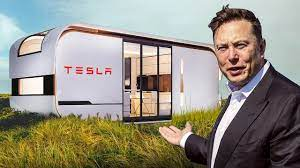

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

### 1. Read the dataset

In [1]:
import pandas as pd
import numpy as np

# load the data from the dataset
file_path = 'energydata_complete.csv'
df = pd.read_csv(file_path)

/var/folders/n3/ddr1nygd4b11p0zv8kwtqx3w0000gn/T/ipykernel_19983/1264679884.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# check if the data is loaded successfully
print(df.head())

               date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  11/01/2016 17:00          60      30  19.89  47.596667  19.2  44.790000   
1  11/01/2016 17:10          60      30  19.89  46.693333  19.2  44.722500   
2  11/01/2016 17:20          50      30  19.89  46.300000  19.2  44.626667   
3  11/01/2016 17:30          50      40  19.89  46.066667  19.2  44.590000   
4  11/01/2016 17:40          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9  T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53   6.60        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56   6.48        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50   6.37        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40   6.25        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40   6.13        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  


Now we can see the data is successfully loaded. Next we will analyse the data

### 2. Analyse and visualise the data

Check the data information and the types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

We can see the type of the date is an object which is different from others, so we need to do convert.
According to research, dataset's date/time variables can generate additional functions: the number of seconds from midnight for each day (NSM), the week status (weekend or workday) and the day of the week (Candanedo et al. 2017, P. 85). So I will convert the 'date' time variable to NSM and week status

In [4]:
import pandas as pd

# Specify the datetime format as '%d/%m/%Y %H:%M'
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

# Generate NSM (number of seconds per day from midnight)
df['NSM'] = (df['date'] - df['date'].dt.normalize()).dt.total_seconds()

# status of weekend and weekday (0 = weekday, 1 = weekend)
df['weekend'] = df['date'].dt.dayofweek // 5

# load the data and check if these two columns are correctly added
print(df.head(700))


                   date  Appliances  lights         T1       RH_1    T2  \
0   2016-01-11 17:00:00          60      30  19.890000  47.596667  19.2   
1   2016-01-11 17:10:00          60      30  19.890000  46.693333  19.2   
2   2016-01-11 17:20:00          50      30  19.890000  46.300000  19.2   
3   2016-01-11 17:30:00          50      40  19.890000  46.066667  19.2   
4   2016-01-11 17:40:00          60      40  19.890000  46.333333  19.2   
..                  ...         ...     ...        ...        ...   ...   
695 2016-01-16 12:50:00          90       0  22.075000  40.045000  21.3   
696 2016-01-16 13:00:00          90       0  22.000000  39.223333  21.1   
697 2016-01-16 13:10:00         100       0  22.000000  39.626667  21.1   
698 2016-01-16 13:20:00          80       0  22.000000  39.566667  21.1   
699 2016-01-16 13:30:00          90       0  21.963333  39.560000  21.1   

          RH_2         T3       RH_3         T4  ...  T_out  Press_mm_hg  \
0    44.790000  19.7900

After the converting, check the info of the dataset again.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

We can see two variables were successfully added

Now construct a heat map of the correlation between features

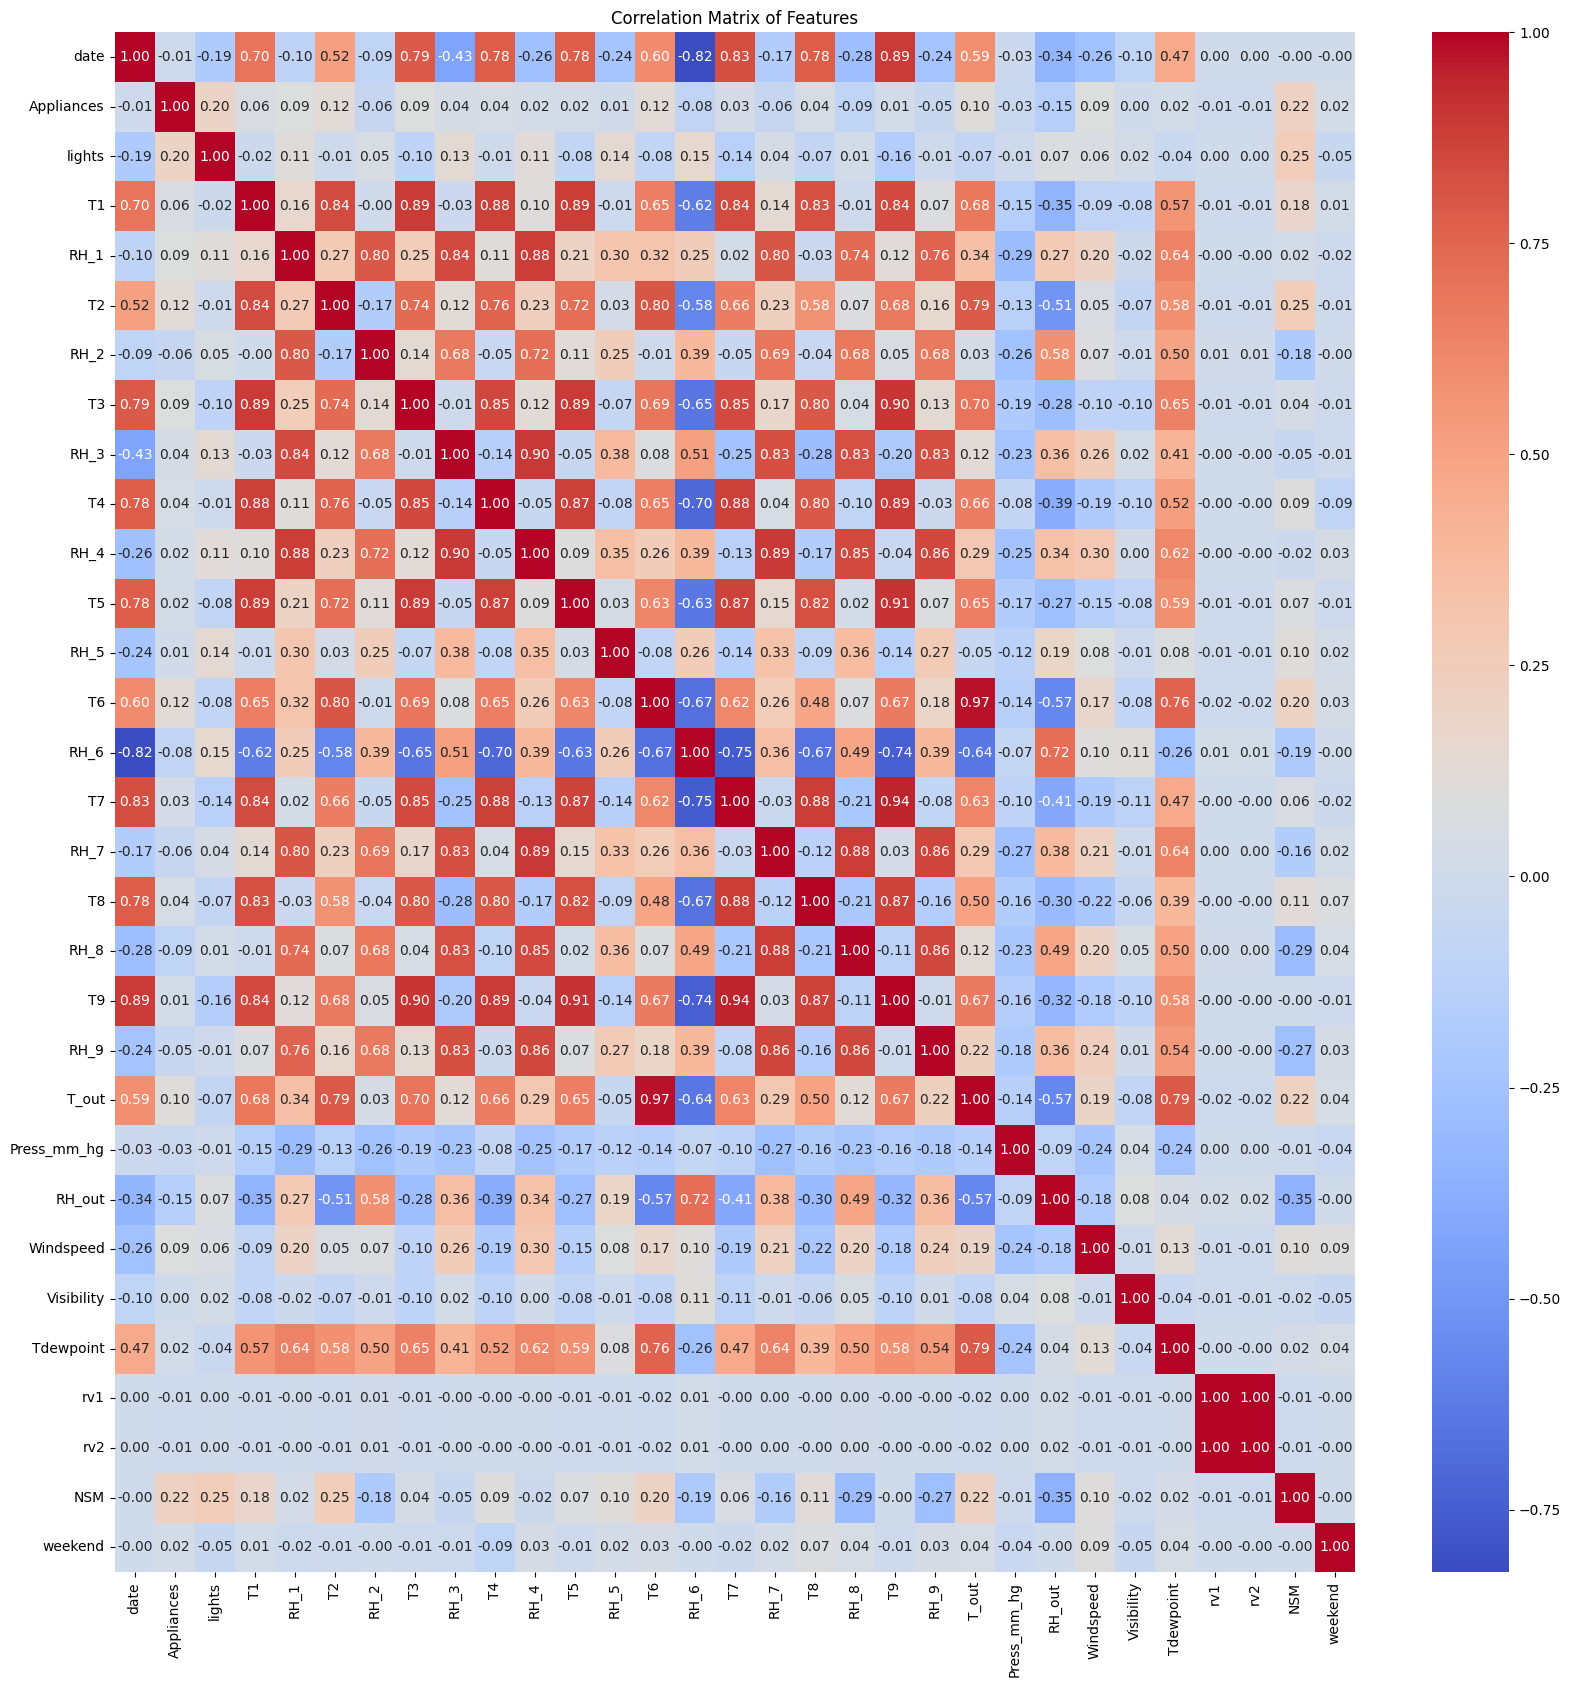

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(20, 20))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# add the title
plt.title('Correlation Matrix of Features')

plt.show()


According to the heatmap, Appliance is highly correlated with T1, RH_1, T2, T3, RH_3, T4, RH_4, T5, RH_5, T6, T7, T8, T9, T_out, Windspeed,Tdewpoint, NSM, weekend, which are all positively correlated.
Next, I will analyse the appliance variable

In [7]:
# check the appliances column information
df['Appliances'].describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

To find outliers, I will visualise the appliances variables as line graphs, histograms and box plots

/var/folders/n3/ddr1nygd4b11p0zv8kwtqx3w0000gn/T/ipykernel_19983/4165792070.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(df['date'], df['Appliances'], linestyle='solid', marker = 'None')


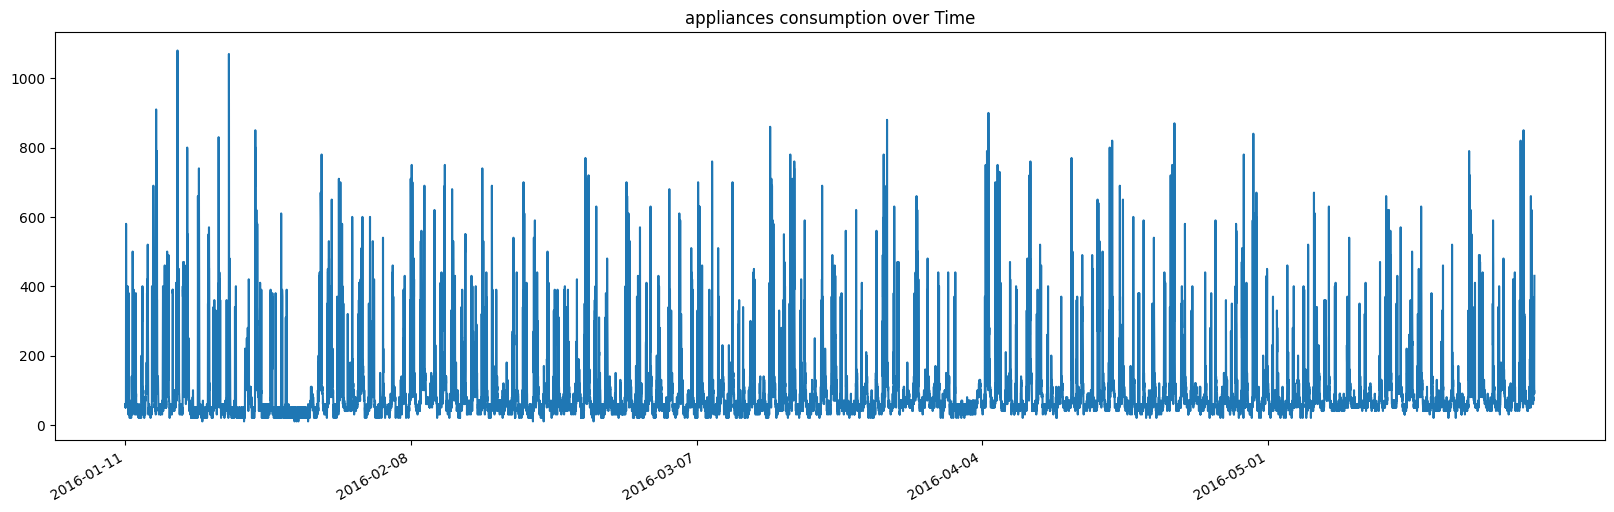

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))
plt.title('appliances consumption over Time')
plt.plot_date(df['date'], df['Appliances'], linestyle='solid', marker = 'None')
plt.gcf().autofmt_xdate()

plt.xticks(df['date'][::4000]) # Display a date every 4000 data points
plt.show()

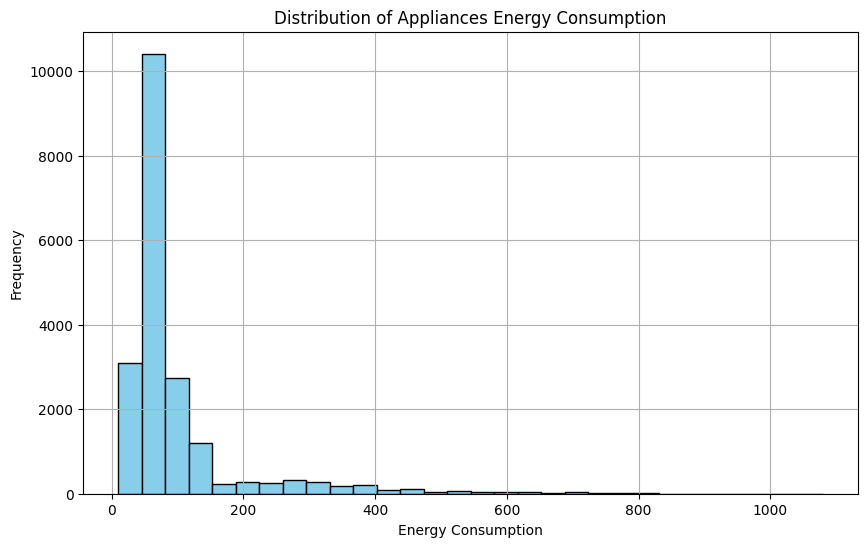

In [9]:
plt.figure(figsize=(10, 6))

plt.hist(df['Appliances'], bins=30, color='skyblue', edgecolor='black')

plt.title('Distribution of Appliances Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')

plt.grid(True)

plt.show()

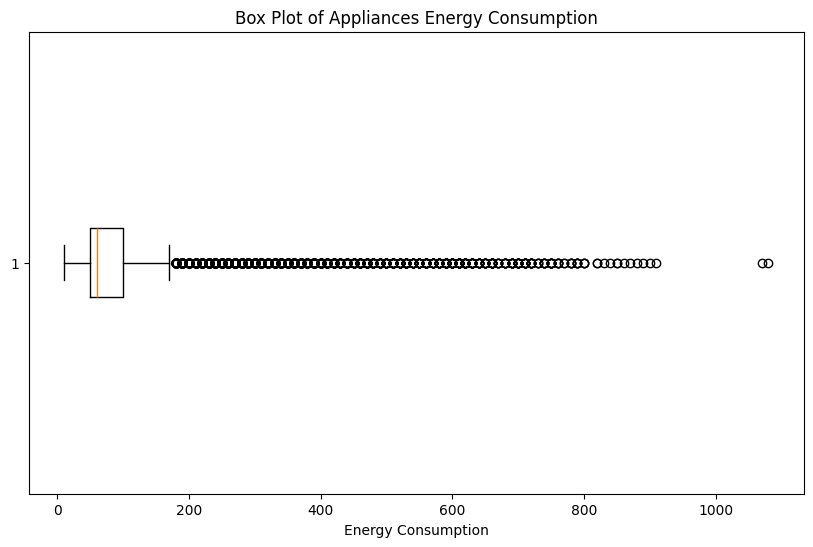

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.boxplot(df['Appliances'], vert=False) 

plt.title('Box Plot of Appliances Energy Consumption')
plt.xlabel('Energy Consumption')

plt.show()


### 3. Pre-process the data

As the graphs result shown above, we can find there are some outliers in appliances. So I will deal with it below.

According to Turkey and John (1977), for "far out" outliers, k is equal to 3. So I'm going to base my data on this.

Q1 = 50, Q3 = 100 => IQR = 100-50 = 50

So, upper whisker = 100+3*50 = 250 and the lower whisker = -3*50+50 = -100

As the result, we will remove the data which is higher than 250

In [11]:
outlier_rows = df[df['Appliances'] > 250]
print(outlier_rows)

                     date  Appliances  lights         T1       RH_1  \
11    2016-01-11 18:50:00         580      60  20.066667  46.396667   
12    2016-01-11 19:00:00         430      50  20.133333  48.000000   
31    2016-01-11 22:10:00         400      20  21.533333  44.966667   
32    2016-01-11 22:20:00         400      20  21.600000  44.766667   
33    2016-01-11 22:30:00         390      30  21.600000  44.560000   
...                   ...         ...     ...        ...        ...   
19704 2016-05-27 13:00:00         370       0  24.890000  47.730000   
19705 2016-05-27 13:10:00         280       0  25.033333  48.363333   
19732 2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733 2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734 2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...  T_out  \
11     19.426667  44.400000  19.790000  44.826667  19.000000  ...   5.9

In [12]:
# delete the outliers
df = df.drop(outlier_rows.index)

print(df['Appliances'].describe())

count    18204.000000
mean        72.153922
std         38.871238
min         10.000000
25%         50.000000
50%         60.000000
75%         90.000000
max        250.000000
Name: Appliances, dtype: float64


Now we can see the outliers are successfully removed.

Next, we will check the if there are any missing values in the data

In [13]:
missing_values = df.isna().sum()

print(missing_values)


date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
weekend        0
dtype: int64


As we can see, we don't have any missing value on the dataset

In [14]:
df.describe()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,weekend
count,18204,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000,...,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000
mean,2016-03-20 16:38:07.343441152,72.153922,3.527247,21.687836,40.177612,20.306432,40.455539,22.240855,39.184481,20.859496,...,7.342740,755.547161,80.123485,3.987106,38.316998,3.765359,25.036199,25.036199,42150.758075,0.277521
min,2016-01-11 17:00:00,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,-5.000000,729.333333,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.000000,0.000000
25%,2016-02-15 15:47:30,50.000000,0.000000,20.760000,37.290000,18.790000,37.900000,20.790000,36.863333,19.566667,...,3.580000,751.000000,71.000000,2.000000,29.000000,0.933000,12.488085,12.488085,19800.000000,0.000000
50%,2016-03-20 22:15:00,60.000000,0.000000,21.600000,39.566667,19.963333,40.530000,22.100000,38.500000,20.666667,...,6.850000,756.100000,84.166667,3.500000,40.000000,3.430000,24.959627,24.959627,41400.000000,0.000000
75%,2016-04-24 03:02:30,90.000000,0.000000,22.600000,42.933333,21.500000,43.297500,23.290000,41.626667,22.100000,...,10.300000,760.933333,91.815476,5.333333,40.000000,6.570000,37.716265,37.716265,64200.000000,1.000000
max,2016-05-27 17:30:00,250.000000,70.000000,26.200000,63.360000,29.856667,56.026667,29.200000,49.930000,26.200000,...,26.100000,772.283333,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,85800.000000,1.000000
std,NaN,38.871238,7.659798,1.606706,3.946553,2.181822,4.065893,1.980642,3.228371,2.047659,...,5.300279,7.367972,14.810749,2.446234,11.926123,4.190249,14.524663,14.524663,25459.986562,0.447788


We can see that data anomalies in appliances have been removed. Below I will do the feature scaling.

Since ‘date’ has already been converted into two features : NSM and weekend. so we will exclude 'date' from dataset

In [15]:
df.drop('date', axis=1, inplace=True)

In [16]:
# using standard scaler to scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# scale the dataset
df_scaled = scaler.fit_transform(df)

# Converts scaled data to a DataFrame and preserves the original column names
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [17]:
df_scaled.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,weekend
count,1.820400e+04,1.820400e+04,1.820400e+04,1.820400e+04,1.820400e+04,1.820400e+04,1.820400e+04,1.820400e+04,1.820400e+04,1.820400e+04,...,1.820400e+04,1.820400e+04,1.820400e+04,1.820400e+04,1.820400e+04,1.820400e+04,1.820400e+04,1.820400e+04,1.820400e+04,1.820400e+04
mean,1.592515e-16,4.371610e-17,-4.996126e-17,1.080412e-15,-1.748644e-16,-2.622966e-16,-5.745544e-16,9.804896e-16,6.994576e-16,1.561289e-15,...,4.996126e-17,-4.015636e-15,-8.743220e-17,1.748644e-16,2.123353e-16,-4.996126e-17,-1.908676e-16,-1.908676e-16,2.722498e-17,1.592515e-16
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,...,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-1.599013e+00,-4.605009e-01,-3.048456e+00,-3.333197e+00,-1.927998e+00,-4.917187e+00,-2.545131e+00,-3.227046e+00,-2.812799e+00,-2.618386e+00,...,-2.328760e+00,-3.557905e+00,-3.789479e+00,-1.629940e+00,-3.129099e+00,-2.473753e+00,-1.723383e+00,-1.723383e+00,-1.655614e+00,-6.197775e-01
25%,-5.699466e-01,-4.605009e-01,-5.774935e-01,-7.316996e-01,-6.950493e-01,-6.285480e-01,-7.325377e-01,-7.190039e-01,-6.313867e-01,-8.072591e-01,...,-7.099331e-01,-6.171693e-01,-6.160212e-01,-8.123346e-01,-7.812476e-01,-6.759589e-01,-8.639414e-01,-8.639414e-01,-8.779020e-01,-6.197775e-01
50%,-3.126799e-01,-4.605009e-01,-5.467018e-02,-1.548090e-01,-1.572577e-01,1.831415e-02,-7.111798e-02,-2.120263e-01,-9.417323e-02,-1.457974e-01,...,-9.296747e-02,7.503476e-02,2.729972e-01,-1.991303e-01,1.411228e-01,-8.003532e-02,-5.272000e-03,-5.272000e-03,-2.948857e-02,-6.197775e-01
75%,4.591201e-01,-4.605009e-01,5.677385e-01,6.982795e-01,5.470660e-01,6.989952e-01,5.297137e-01,7.564970e-01,6.058323e-01,7.151038e-01,...,5.579596e-01,7.310451e-01,7.894477e-01,5.503416e-01,1.411228e-01,6.693440e-01,8.730264e-01,8.730264e-01,8.660589e-01,1.613482e+00
max,4.575387e+00,8.678373e+00,2.808410e+00,5.874246e+00,4.377304e+00,3.829800e+00,3.513676e+00,3.328556e+00,2.608174e+00,2.794203e+00,...,3.539017e+00,2.271538e+00,1.342070e+00,4.093300e+00,2.321271e+00,2.800541e+00,1.718526e+00,1.718526e+00,1.714472e+00,1.613482e+00


The dataset has successfully been scaled.

Then I will be splitting the data and divide it into two parts: the test set and the training set

Above, the correlation heatmap has already been shown. The features that are highly relevant to appliances are: 'lights', 'T1', 'RH_1', 'T2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'T7', 'T8', 'T9', 'T_out', 'Windspeed','Tdewpoint', 'NSM', 'weekend'

To verify that the features we pick are important, I will use L1 regularisation to select features.

In [18]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('Appliances', axis = 1)
y = df_scaled['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import Lasso

# Using lasso to select important features
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

lasso_Coefficient = pd.DataFrame({'Features': X.columns, 'Coefficient': lasso.coef_})
selected_features = lasso_Coefficient.loc[lasso_Coefficient['Coefficient']
                                     != 0, 'Features']

print('Selected features', selected_features.to_list())

Selected features ['lights', 'T2', 'T6', 'T8', 'RH_out', 'NSM']


The results show that all the features we have chosen are important. Therefore I will select the features based on L1 regularisation.

In [19]:
selected_features = ['lights', 'T2', 'T6', 'T8', 'RH_out', 'NSM']
X_selected = df[selected_features]

# create a new train and test set
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print("Shape of X_train_selected:", X_train.shape)
print("Shape of X_test_selected:", X_test.shape)

Shape of X_train_selected: (14563, 6)
Shape of X_test_selected: (3641, 6)


### 4. Implement, train and test prediction models

According to a study, I will use linear regression model as a prediction because it is considered relatively easy to implement, relatively less computationally intensive, high predictive power and high data availability (Fumo & Rafe 2015, p.333).

In [20]:
# linear regression
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
linear_trainScore = linear_reg.score(X_train, y_train)

print("Linear Regression Model:")
print("Mean Squared Error (MSE):", mse_linear)
print("Root Mean Squared Error (RMSE):", rmse_linear)
print("Mean Absolute Error (MAE):", mae_linear)
print("Train Score of Linear Regression:", linear_trainScore)

Linear Regression Model:
Mean Squared Error (MSE): 0.8259084313087495
Root Mean Squared Error (RMSE): 0.9087950436202595
Mean Absolute Error (MAE): 0.5890645981120011
Train Score of Linear Regression: 0.18057239065412622


According to the study, Random Forest outperforms other widely used classifiers such as Artificial Neural Networks and Support Vector Machines in energy consumption prediction (Chen et al. 2019, p. 957). So we also use random forest model to predict the energy consumption

In [21]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rf_trainScore = random_forest.score(X_train, y_train)

print("Random Forest Model:")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("Train Score of Random Forest Regression:", rf_trainScore)

Random Forest Model:
Mean Squared Error (MSE): 0.4518634110870476
Root Mean Squared Error (RMSE): 0.672207863005966
Mean Absolute Error (MAE): 0.39731486881126465
Train Score of Random Forest Regression: 0.9398363523478593


V E et al.(2021) used a KNN model for prediction and they concluded that the efficiency of KNN is optimal for practical applications. So I use their methodology here to predict energy consumption

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

y_pred_knn = knn_reg.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
knn_train_score = knn_reg.score(X_train, y_train)

print("KNN Regression Model:")
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("Mean Absolute Error (MAE):", mae_knn)
print("Train Score of KNN Regression:", knn_train_score)

KNN Regression Model:
Mean Squared Error (MSE): 0.8360846484033293
Root Mean Squared Error (RMSE): 0.9143766447166777
Mean Absolute Error (MAE): 0.5803444649246301
Train Score of KNN Regression: 0.457985714105552


### 5. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

MSE, MAE and RMSE are convenient measures of "mean error" used to assess the degree of variability in the data (Lyu et al. 2022, p.1488). So we visualise the data based on the above results for comparison

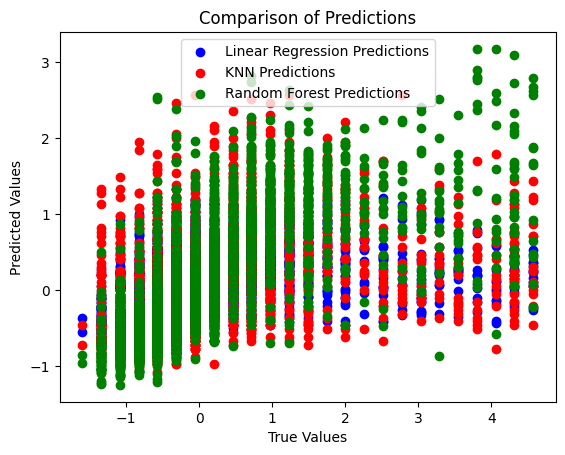

In [23]:
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression Predictions')
plt.scatter(y_test, y_pred_knn, color='red', label='KNN Predictions')
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest Predictions')

plt.title("Comparison of Predictions")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.legend()
plt.show()

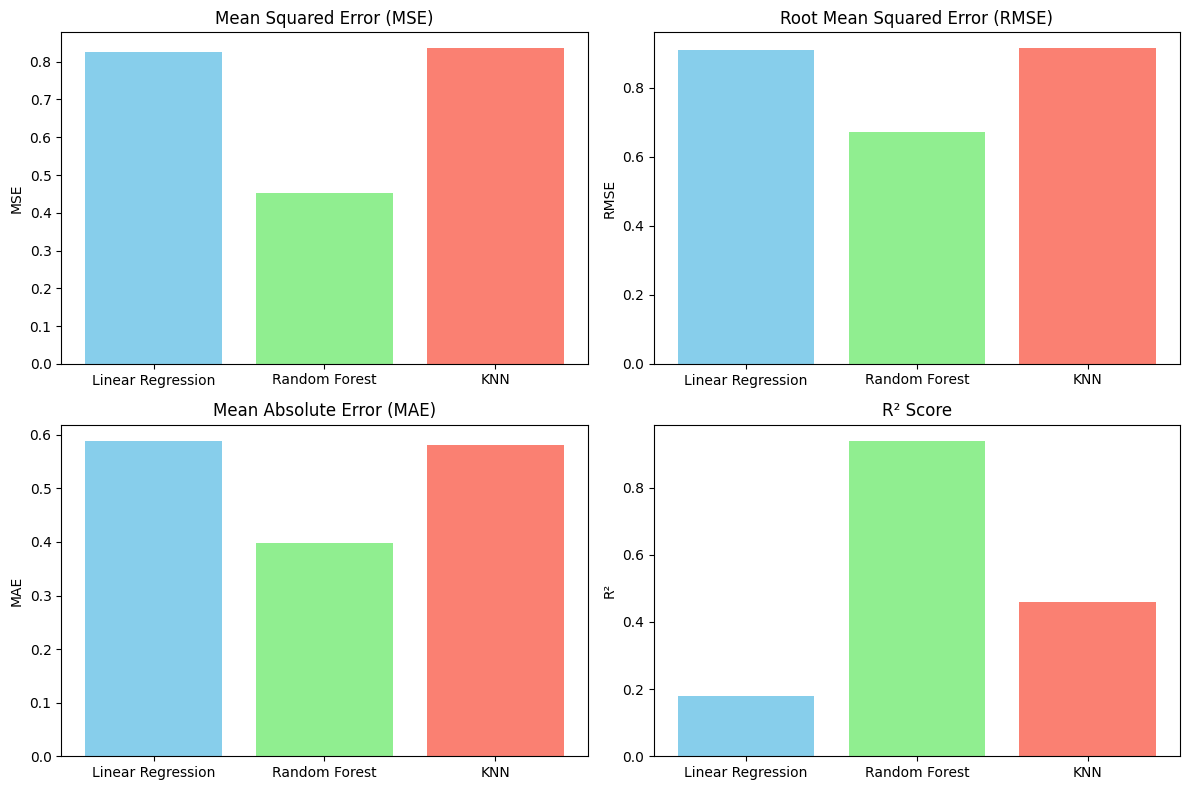

In [24]:
model_labels = ['Linear Regression', 'Random Forest', 'KNN']

mse_scores = [mse_linear, mse_rf, mse_knn]
rmse_scores = [rmse_linear, rmse_rf, rmse_knn]
mae_scores = [mae_linear, mae_rf, mae_knn]
r2_scores = [linear_trainScore, rf_trainScore, knn_train_score]

plt.figure(figsize=(12, 8))

# MSE
plt.subplot(2, 2, 1)
plt.bar(model_labels, mse_scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

# RMSE
plt.subplot(2, 2, 2)
plt.bar(model_labels, rmse_scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')

# MAE
plt.subplot(2, 2, 3)
plt.bar(model_labels, mae_scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

# R²
plt.subplot(2, 2, 4)
plt.bar(model_labels, r2_scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('R² Score')
plt.ylabel('R²')

plt.tight_layout()

plt.show()


We can conclude that random forest has the smallest model prediction error and therefore the model is better at predicting. As the result, random forest model works the best in predicting the energy consumption. In terms of R^2 score, random forest is the highest, which is 0.93. KNN is the second highest one, which is 0.45. While linear regression is the lowest, which is below 0.18.

### 6. Reflect on what you have learned by completing this assignment and how to improve the models

By completing this assignment I have learnt how to visualise data, pre-process data and use implement machine learning models such as linear regression, random forests and k-nearest neighbours. They all involve importing data, data preprocessing, splitting and training the dataset. Where they are not the same is that computer vision cannot handle the missing dataset because it is based on a dataset consisting of various pictures.

In fact, I took a similar class last year called Computer Vision, which had roughly the same steps except for the data visualisation. 

In terms of model improvement and optimisation, I think I could try using more complex model architectures. Additionally, I can try integrated learning methods that combine multiple models for better performance.

For model selection, I can also try more models to get the best model. 

In terms of dataset, I can try to add new attributes that will help the models to capture patterns and trends in the data more accurately.

### 7. References

[1] Candanedo, LM, Feldheim, V & Deramaix, D 2017, ‘Data driven prediction models of energy use of appliances in a low-energy house’, *Energy and Buildings*, vol. 140, pp. 81–97.

[2] Chen, YT, Piedad, E & Kuo, CC 2019, ‘Energy consumption load forecasting using a level-based random forest classifier’, *Symmetry (Basel)*, vol. 11, no. 8, pp. 956-965.

[3] Fumo, N & Rafe Biswas, MA 2015, ‘Regression analysis for prediction of residential energy consumption’, *Renewable & Sustainable Energy Reviews*, vol. 47, pp. 332–343.

[4] Lyu, Z, Yu, Y, Samali, B, Rashidi, M, Mohammadi, M, Nguyen, TN & Nguyen, A 2022, ‘Back-Propagation Neural Network Optimized by K-Fold Cross-Validation for Prediction of Torsional Strength of Reinforced Concrete Beam’, *Materials*, vol. 15, no. 4, pp. 1477-1498.

[5] Tukey, JW & John W, 1977, Exploratory data analysis, *Addison-Wesley Pub. Co.*, U.S.A.

[6] V E, S, Shin, C & Cho, Y 2021, ‘Efficient energy consumption prediction model for a data analytic-enabled industry building in a smart city’, *Building Research and Information : The International Journal of Research*, Development and Demonstration, vol. 49, no. 1, pp. 127–143.